In [62]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.ticker import StrMethodFormatter

# Load data
df = pd.read_csv("occupation_age.csv")
df_io = pd.read_csv("Industry and Occupation.csv") # use the same variable with other teammates
df2 = pd.read_csv("salary.csv")

In [63]:
print(df.head())
print(df_io.head())
print(df2.head())

  Age Group                                         Occupation    2024  \
0  All Ages                                    All Occupations  2365.6   
1  All Ages  Managers & Administrators (Including Working P...   404.9   
2  All Ages                                      Professionals   619.9   
3  All Ages              Associate Professionals & Technicians   483.1   
4  All Ages                           Clerical Support Workers   209.6   

     2023    2022    2021    2020    2019    2018    2017  ...    2009   2008  \
0  2352.3  2350.4  2286.5  2222.6  2230.4  2203.7  2175.3  ...  1869.4   1852   
1   369.9   407.7   377.7   368.3   364.9   341.6   348.8  ...   310.8  303.3   
2   620.6   600.9   577.5   504.2   469.4   449.2   437.6  ...   341.8  334.5   
3   482.5   485.7   465.8   458.2   467.9     465   436.2  ...   309.8  307.8   
4   207.8   211.8   223.4   215.6   237.2     241   247.9  ...   236.5    237   

     2007    2005    2004    2003    2002    2001    2000  Sex  
0  

In [64]:
# Check and identify year columns
year_cols = [col for col in df.columns if col.isdigit()]
year_cols = sorted(year_cols, key=int)
year_min, year_max = int(year_cols[0]), int(year_cols[-1])

# Clean numeric columns to prevent error
for col in year_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Filter totals only as we want to show all data
filtered = df[(df['Sex']=='All') & (df['Age Group']=='All Ages') & (df['Occupation']=='All Occupations')]

## Employment Trend Over the Year

In [65]:
# Filter only for "All" or total data (All groups and All occupations)
total_df = df[
    (df["Sex"] == "All") &
    (df["Age Group"] == "All Ages") &
    (df["Occupation"] == "All Occupations")]

# Calculate the total employment for each year
total_employment = total_df[year_cols].sum()

# Create a dataframe for the data reuslt
total_emp_trend_df = pd.DataFrame({
    "Year": [int(y) for y in year_cols],
    "Total Employment": total_employment.values})

total_emp_trend_df

,Year,Total Employment
0,2000,1482.6
1,2001,1582.5
2,2002,1573.7
3,2003,1605.4
4,2004,1632.1
5,2005,1647.3
6,2007,1803.2
7,2008,1852.0
8,2009,1869.4
9,2010,1962.9


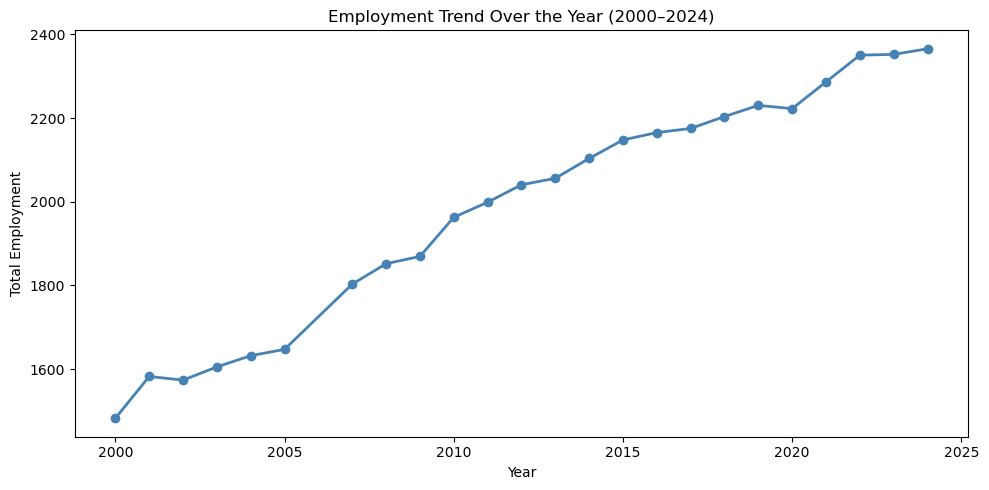

In [5]:
# Create the visualization
plt.figure(figsize=(10,5))
plt.plot(total_emp_trend_df["Year"], total_emp_trend_df["Total Employment"], color="steelblue", marker="o", linewidth=2)

plt.title("Employment Trend Over the Year (2000–2024)")
plt.xlabel("Year")
plt.ylabel("Total Employment")
plt.tight_layout()
plt.show()

### Employment Trend Over the Year

- **Total employment in Singapore has grown steadily** from 2000 to 2024, reflecting a strong and expanding job market or economic condition.  
- The workforce increased from around **1.5 million to over 2.3 million**.
- Slight decrease can be seen when **global economic slowdowns** happened, such as 2008-2009 and 2020 (during the pandemic), but recovery is typically quick.

## Employment Growth Over the Year

In [66]:
# Calculate year-to-year growth rates
growth_by_year = {}

# Create looping
for i in range(1, len(year_cols)):
    prev_year = str(year_cols[i-1])
    curr_year = str(year_cols[i])
    
    total_previous = filtered[prev_year].sum()
    total_current = filtered[curr_year].sum()
    
    if total_previous > 0:
        growth_rate_yoy = ((total_current - total_previous) / total_previous) * 100
    else:
        growth_rate_yoy = None  # Avoid division by zero
    
    growth_by_year[f"{prev_year}-{curr_year}"] = growth_rate_yoy

# Convert to DataFrame for creating the table of each year period and its growth
growth_df = pd.DataFrame(list(growth_by_year.items()), columns=['Period', 'Growth (%)'])
growth_df

,Period,Growth (%)
0,2000-2001,6.738163
1,2001-2002,-0.556082
2,2002-2003,2.014361
3,2003-2004,1.663137
4,2004-2005,0.931315
5,2005-2007,9.463971
6,2007-2008,2.706300
7,2008-2009,0.939525
8,2009-2010,5.001605
9,2010-2011,1.834021


### Year-to-Year Employment Growth

- Overall, Singapore’s job market has grown **steadily** over 2000 to 2024 period.
- **A decrease in employment growth in 2001–2002 (−0.6%)**, due to a global economic slowdown following the US recession (Source: Ministry of Manpower Singapore).
- **COVID-19 impact:** A slight decreased in **2019–2020 (−0.35%)** aligns with the pandemic period, but the quick **recovery in 2021–2022 (+2.8%)** reflects Singapore’s resilience and adaptability in the job market.
- **Recent years (2022–2024):** Growth has slowed again (under **1%**), suggesting the economy is stabilizing after the pandemic rebound.

## Gender Distribution in Each Year

In [67]:
# Analyze gender distribution each year
gender_df = df[
    (df["Sex"].isin(["Male", "Female"])) &
    (df["Age Group"] == "All Ages") &
    (df["Occupation"] == "All Occupations")]
male_total = gender_df[gender_df["Sex"] == "Male"][year_cols].sum().values
female_total = gender_df[gender_df["Sex"] == "Female"][year_cols].sum().values

# Calculate the distribution percentage
total = male_total + female_total
male_share = (male_total / total) * 100
female_share = (female_total / total) * 100

# Show the result in dataframe
gender_share_df = pd.DataFrame({
    "Year": year_cols,
    "Male (%)": [round(i, 2) for i in male_share],
    "Female (%)": [round(i, 2) for i in female_share]
})

gender_share_df

,Year,Male (%),Female (%)
0,2000,60.00,40.00
1,2001,59.30,40.70
2,2002,59.59,40.41
3,2003,59.10,40.90
4,2004,58.87,41.13
5,2005,58.26,41.74
6,2007,57.59,42.41
7,2008,56.89,43.11
8,2009,57.03,42.97
9,2010,56.37,43.63


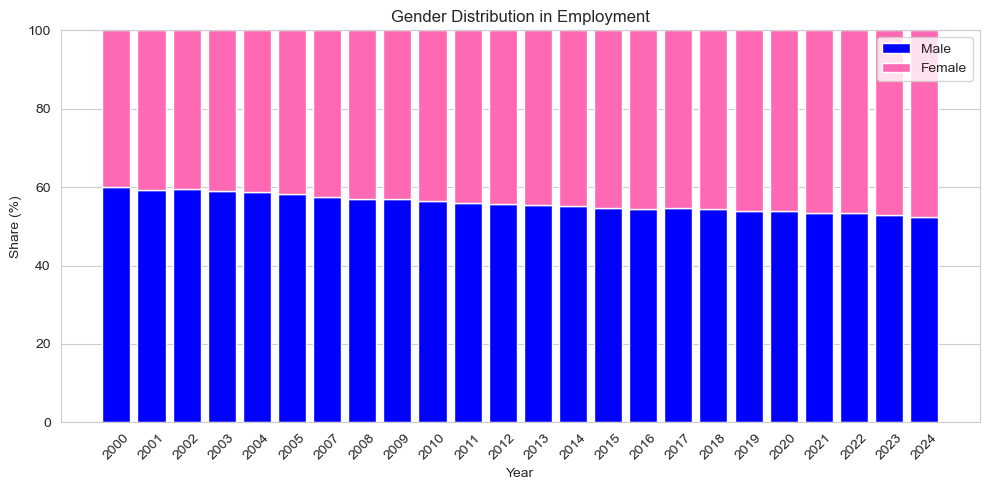

In [68]:
# Create the visualization with stacked bar chart
plt.figure(figsize=(10,5))
plt.bar(gender_share_df["Year"], gender_share_df["Male (%)"], color="blue", label="Male")
plt.bar(gender_share_df["Year"], gender_share_df["Female (%)"],
        bottom=gender_share_df["Male (%)"], color="hotpink", label="Female")

plt.title("Gender Distribution in Employment")
plt.xlabel("Year")
plt.ylabel("Share (%)")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()

### Gender Distribution Over Year

- Female participation in the workforce has **grown steadily** over the past two decades.  
  In 2000, female made up around 40% of total employment. While in 2024, the contribution increased to nearly **47.7%**.  
- **Male employment share has gradually declined**, decreasing from roughly **60% to 52.3%**, reflecting a more balanced gender composition in Singapore’s job market.  
- The consistent upward trend for women indicates **greater inclusion and equal access to career opportunities** in Singapore's job market.

## Age Group Distribution in Latest Available Year

In [69]:
# Get the latest available year from data (which is 2024)
target_year = int(year_cols[-1])
year_col = str(target_year)

# Filter for total employment by age
age_df = df[
    (df["Age Group"] != "All Ages") &
    (df["Occupation"] == "All Occupations") &
    (df["Sex"] == "All")]

# Group and summarize
age_group_df = age_df.groupby("Age Group")[year_col].sum().reset_index()
age_group_df.rename(columns={year_col: "Employment Count"}, inplace=True)

# Order age groups
age_order = [
    "15-19 Years Old", "20-24 Years Old", "25-29 Years Old",
    "30-34 Years Old", "35-39 Years Old", "40-44 Years Old",
    "45-49 Years Old", "50-54 Years Old", "55-59 Years Old",
    "60-64 Years Old", "65 Years & Over"]

age_group_df["Age Group"] = pd.Categorical(age_group_df["Age Group"], categories=age_order, ordered=True)
age_group_df = age_group_df.sort_values("Age Group")

# Show the dataframe
age_group_df

,Age Group,Employment Count
0,15-19 Years Old,25.1
1,20-24 Years Old,106.5
2,25-29 Years Old,203.7
3,30-34 Years Old,269.6
4,35-39 Years Old,282.2
5,40-44 Years Old,285.0
6,45-49 Years Old,262.7
7,50-54 Years Old,260.7
8,55-59 Years Old,220.1
9,60-64 Years Old,202.7


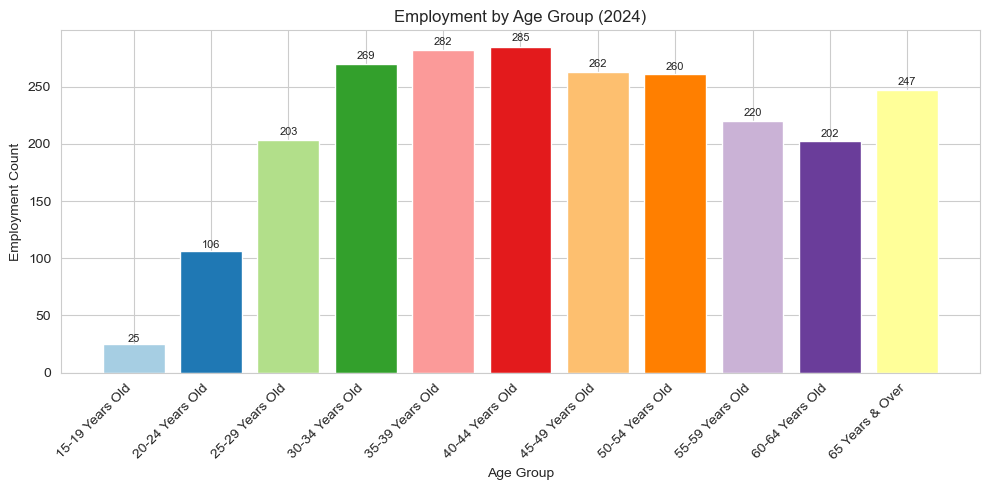

In [70]:
# Create the visualization by using bar chart
plt.figure(figsize=(10,5))
bars = plt.bar(age_group_df["Age Group"], age_group_df["Employment Count"], color=plt.cm.Paired.colors)

# Add labels in the bar chart
for i, val in enumerate(age_group_df["Employment Count"]):
    plt.text(i, val + (val * 0.01), f"{int(val):,}", ha="center", va="bottom", fontsize=8)

plt.title(f"Employment by Age Group ({target_year})")
plt.xlabel("Age Group")
plt.ylabel("Employment Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Employment Trends by Age Group (2000–2024)

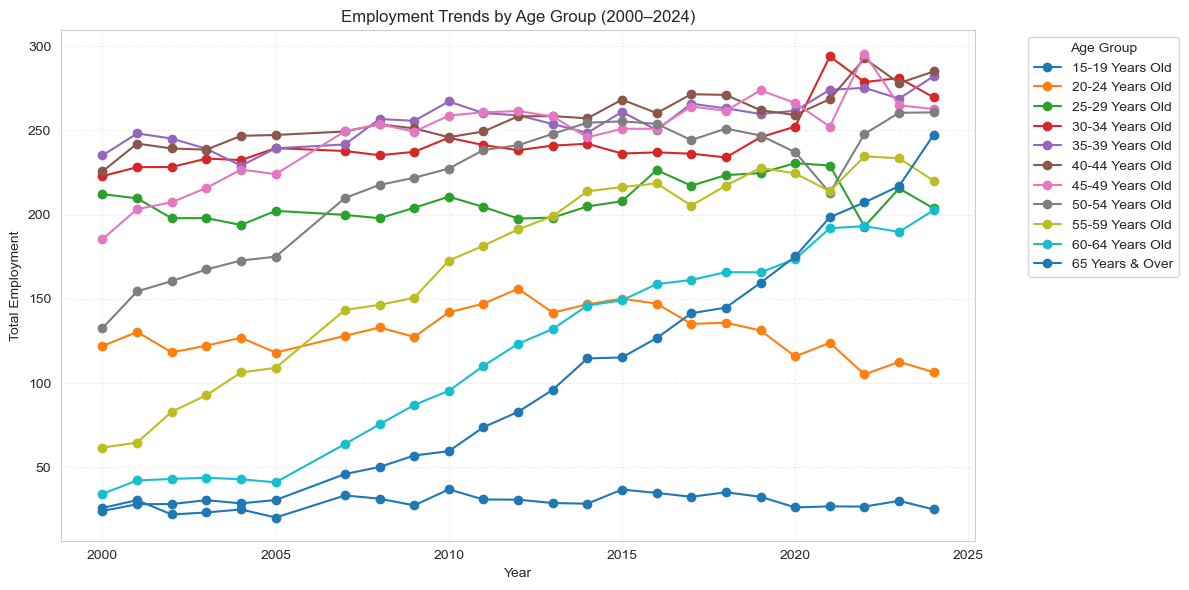

In [71]:
# Group by Age Group and get totals for each year
age_trend_df = age_df.groupby("Age Group")[year_cols].sum().T
age_trend_df.index = [int(y) for y in age_trend_df.index] 

# Create the chart visualization
plt.figure(figsize=(12,6))
for age_group in age_trend_df.columns:
    plt.plot(age_trend_df.index, age_trend_df[age_group], marker="o", label=age_group)

plt.title("Employment Trends by Age Group (2000–2024)")
plt.xlabel("Year")
plt.ylabel("Total Employment")
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Employment Trends by Age Group (2000–2024)

- **Mid-age workers (30–54 years old)** has the highest and most stable employment levels over year.  
- **Younger groups (15–24 years old)** show low and flat employment trends, mainly due to extended education and later entry into full-time work.
- These patterns highlight the importance of **lifelong learning and career upskilling** to sustain employability in a maturing labor market.


In [72]:
path = "employment_by occupation & industry.csv"
df = pd.read_csv(path)

df["employment"] = pd.to_numeric(df["employment"], errors="coerce")
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# drop incomplete rows
df = df.dropna(subset=["occupation", "industry", "year", "employment"])

# rows to exclude
bad_occ = df["occupation"]=="All Occupation Groups, (Total Employed Residents)"

bad_ind = df["industry"]=="All Industries"

bad_services = df["industry"]=="Services" 
# final cleaned table 
df_clean = df.loc[~(bad_occ | bad_ind | bad_services)].reset_index(drop=True)

Hiring Volume by Industry — 2024
                                       industry  employment
15                     Wholesale & Retail Trade       336.2
12   Public Administration & Education Services       305.7
4                Financial & Insurance Services       239.5
7                                 Manufacturing       212.1
14                     Transportation & Storage       197.8
11                        Professional Services       197.1
5                      Health & Social Services       174.5
0                 Accommodation & Food Services       147.5
6                  Information & Communications       139.3
1             Administrative & Support Services       124.0
3                                  Construction       102.9
8   Other Community, Social & Personal Services        73.0
10                  Other Occupation Groups Nes        57.4
13                         Real Estate Services        56.3
2              Arts, Entertainment & Recreation        37.8
9      

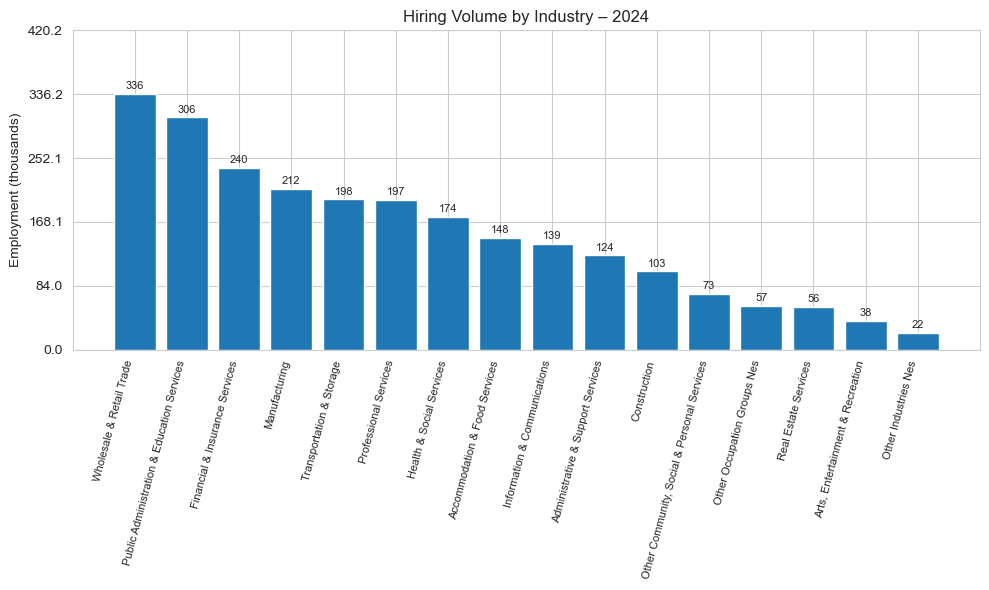

In [73]:
df_clean = df_clean[df_clean["year"] == 2024].copy()

by_industry_2024 = (df_clean.groupby("industry", as_index=False)["employment"]
                             .sum()
                             .sort_values("employment", ascending=False))

print("Hiring Volume by Industry — 2024")
print(by_industry_2024)

x = np.arange(len(by_industry_2024))
y = by_industry_2024["employment"].values
labs = by_industry_2024["industry"].values

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(x, y)

ax.bar_label(bars, fmt='{:.0f}', padding=2, fontsize=8)
ax.set_title("Hiring Volume by Industry – 2024")
ax.set_ylabel("Employment (thousands)")

upper = y.max() * 1.25
ax.set_ylim(0, upper)
ax.set_yticks(np.linspace(0, upper, 6))

ax.set_xticks(x)
ax.set_xticklabels(labs, rotation=75, ha="right", fontsize=8)

plt.tight_layout()
plt.show()

This hiring volume bar chart can show the popularity of different industries in 2024. As we can see the Wholesale & Retail Trade is the most popuplar Industry in 2024. The employments is 336 thousands. 

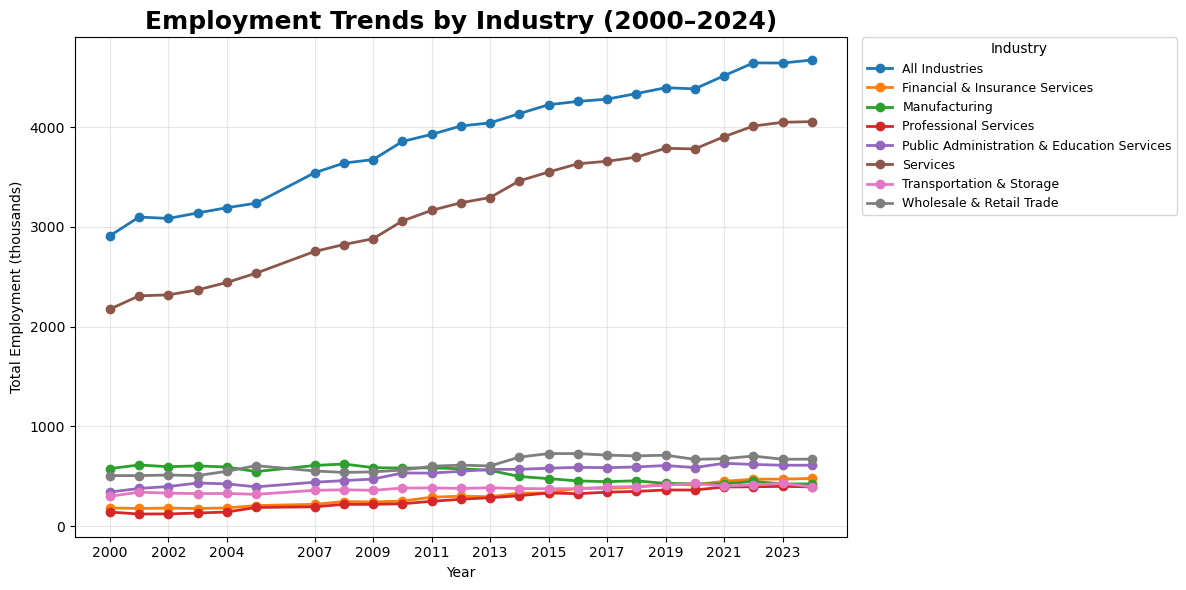

In [74]:
df["year"] = df["year"].astype(int)
df = df[df["year"].between(2000, 2024, inclusive="both")].copy()
df = df[df["year"] != 2006]

yi = (df.groupby(["year", "industry"], as_index=False)["employment"]
        .sum())

TOP_K = 8
top_ind = (yi.groupby("industry")["employment"].sum()
             .sort_values(ascending=False)
             .head(TOP_K).index)
yi_top = yi[yi["industry"].isin(top_ind)]

wide = yi_top.pivot(index="year", columns="industry", values="employment").sort_index()

plt.style.use("default") 
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

for col in wide.columns:
    ax.plot(wide.index, wide[col].values, marker="o", linewidth=2, label=col)

yr_min, yr_max = int(wide.index.min()), int(wide.index.max())
ax.set_title(f"Employment Trends by Industry ({yr_min}–{yr_max})", fontsize=18, weight="bold")
ax.set_ylabel("Total Employment (thousands)")
ax.set_xlabel("Year")
ax.grid(True, alpha=0.3)

years = wide.index.values
step = max(1, len(years) // 12)
shown_years = years[::step]
ax.set_xticks(shown_years)

ax.legend(title="Industry", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0., fontsize=9)

plt.tight_layout()
plt.show()

In the employment trends graph above, you can clearly see the changing between different industry. For most of the industries the employment trend is consistently going up. However, for Manufacturing, the trend is decreasing.

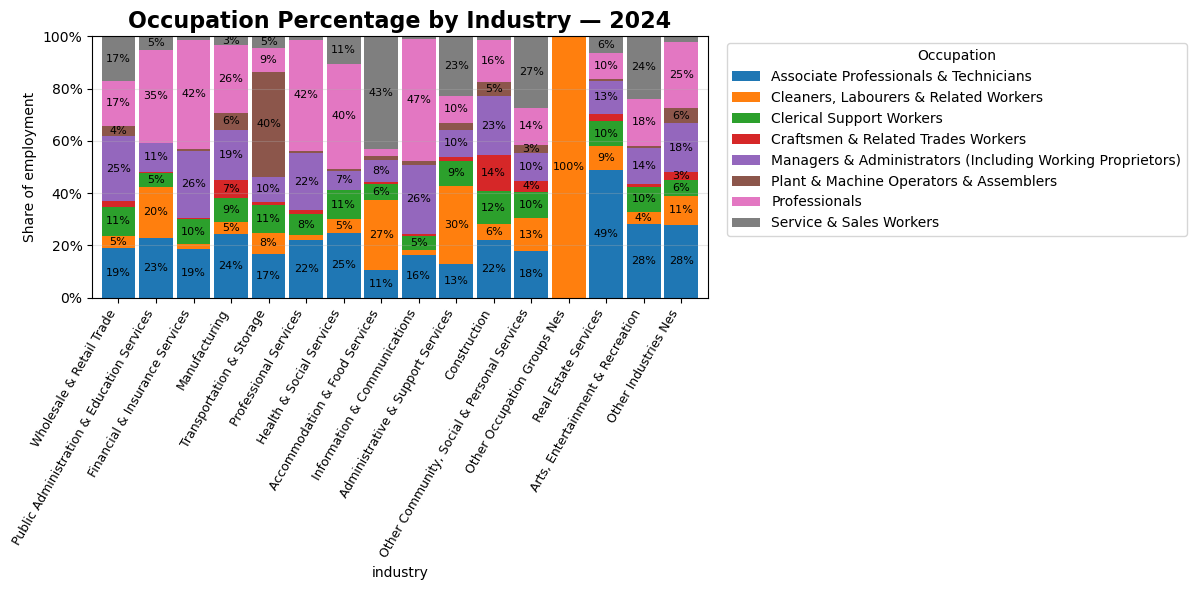

In [75]:
io = df_clean.groupby(["industry", "occupation"], as_index=False)["employment"].sum()

top_occ = io.groupby("occupation")["employment"].sum().nlargest(TOP_K).index
io["occ_slim"] = np.where(io["occupation"].isin(top_occ), io["occupation"], "Other")

wide = (io.groupby(["industry", "occ_slim"], as_index=False)["employment"].sum()
          .pivot(index="industry", columns="occ_slim", values="employment").fillna(0.0))
wide = wide.div(wide.sum(axis=1), axis=0)

order_ind = df_clean.groupby("industry")["employment"].sum().sort_values(ascending=False).index
wide = wide.reindex(order_ind)

plt.style.use("default")
fig, ax = plt.subplots(figsize=(12, 6))
wide.plot(kind="bar", stacked=True, ax=ax, width=0.9)

THRESH = 0.03 # only label segments that are more than 3%
for container in ax.containers: # every rectangle bars
    heights = np.array([patch.get_height() for patch in container]) # get the proportion of height for each bars inside the big bar
    labels = np.where(heights >= THRESH,
                      [f"{h*100:.0f}%" for h in heights],
                      "") # label the portion if it's larger than 3% of the whole bar
    ax.bar_label(container, labels=labels, label_type="center", fontsize=8,color="black")


ax.set_title("Occupation Percentage by Industry — 2024", fontsize=16, weight="bold")
ax.set_ylabel("Share of employment")
ax.set_xticklabels(wide.index, rotation=60, ha="right", fontsize=9)
ax.set_ylim(0, 1.0)
ticks = np.linspace(0, 1.0, 6)
ax.set_yticks(ticks)
ax.set_yticklabels([f"{t*100:.0f}%" for t in ticks])
ax.grid(axis="y", alpha=0.3)
ax.legend(title="Occupation", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

In this graph you can see the percentage of different occupation in different industry. As you can see, In the most popular industry like Wholesale & Retail Trade, The distribution of different occupations is quite even. 

In [76]:
# Data reading and cleaning
file_path = "occupation_age.csv"  
df = pd.read_csv(file_path)


In [77]:
# Extract the year column
year_cols = sorted([col for col in df.columns if col.isdigit()], key=int)

In [78]:
# Convert the value to floating point
for col in year_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Hiring Occupation EDA

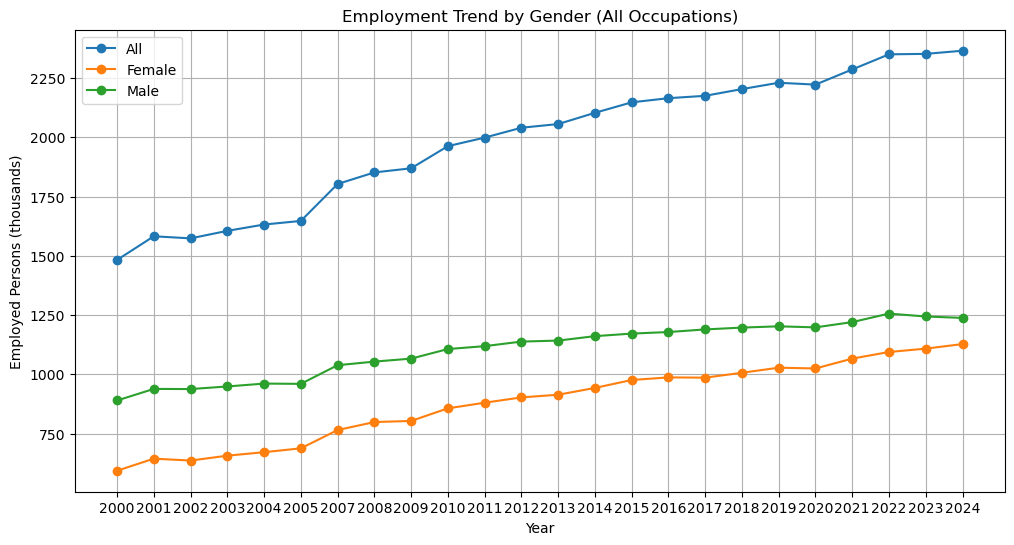

In [79]:
#1. Overall Employment Trend and Employment by gender
df_sex = df[(df["Occupation"]=="All Occupations") & 
            (df["Age Group"]=="All Ages")]
plt.figure(figsize=(12,6))
for sex, grp in df_sex.groupby("Sex"):
    plt.plot(year_cols, grp[year_cols].values.flatten(), marker="o", label=sex)
plt.title("Employment Trend by Gender (All Occupations)")
plt.xlabel("Year")
plt.ylabel("Employed Persons (thousands)")
plt.legend()
plt.grid(True)
plt.show()

From 2000 to 2024, overall employment in all occupations showed a steady upward trend, with total employment increased from around 1.5 million to over 2.3 million.  

Male employment is higher than female employment, though the gap gradually narrowed, indicating increasing female participation in the workforce.

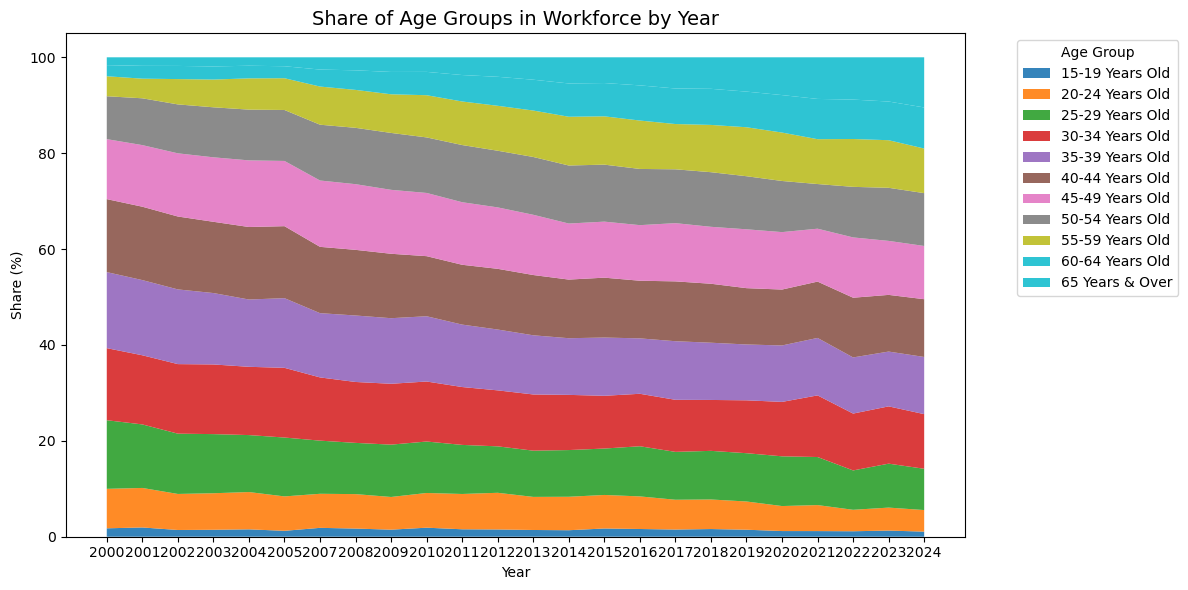

In [80]:
# 2. Filter dataset: keep only total occupation and both sexes
df_age_total = df[
    (df["Occupation"] == "All Occupations") &
    (df["Sex"] == "All") &
    (df["Age Group"] != "All Ages")
]

# 2. Get all distinct age groups and define color palette
age_groups = sorted(df_age_total["Age Group"].unique())
colors = cm.tab10(np.linspace(0, 1, len(age_groups)))   # use a diverse colormap

# 3. Calculate percentage share of each age group per year
df_age_share = df_age_total.set_index("Age Group")[year_cols]
df_age_share = df_age_share.div(df_age_share.sum(axis=0), axis=1) * 100


# 4. Plot stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(
    year_cols,
    df_age_share.values,
    labels=age_groups,
    colors=colors,
    alpha=0.9
)

# 5. Chart formatting
plt.title("Share of Age Groups in Workforce by Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Share (%)")
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

The chart illustrates how the composition of Singapore’s workforce by age group has evolved from 2000 to 2024. 

We can observe that younger age groups (15–24 years) have declined, indicating fewer young individuals entering the labor market, likely due to longer education pathways and delayed workforce entry. 

Next,the core working-age groups (30–49 years) continue to make up the largest share of the workforce, though their proportion has slightly decreased over time as the population ages. 

Lastly, older workers (50 years and above) show a steady and notable increase in workforce share, especially among those 60–64 and 65+, reflecting active aging policies and longer employment participation.


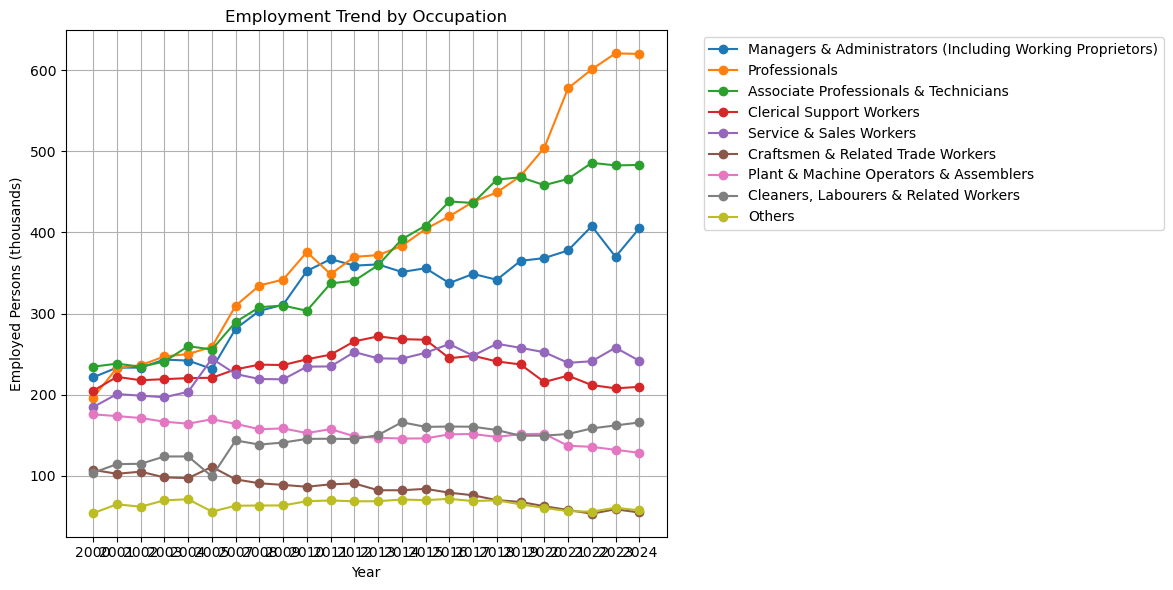

In [81]:
#3.Employment Trend by Occupation
plt.figure(figsize=(12,6))
df_occ = df[(df["Age Group"]=="All Ages") & 
            (df["Sex"]=="All") & 
            (df["Occupation"]!="All Occupations")]
for _, row in df_occ.iterrows():
    plt.plot(year_cols, row[year_cols].values.flatten(), label=row["Occupation"], marker="o")
plt.title("Employment Trend by Occupation")
plt.xlabel("Year")
plt.ylabel("Employed Persons (thousands)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

The chart shows divergence in employment growth across occupational groups over the past two decades.

1, Professionals have seen the most rapid growth, rising sharply after 2015 and becoming the largest occupational group by 2024.

2, Associate Professionals & Technicians also show strong expansion, reflecting the growing demand for skilled technical roles in Singapore’s economy.

3, Managers & Administrators have maintained a steady increase, indicating continuous growth in leadership and management positions.

4, In contrast, Clerical Support Workers, Craftsmen, and Plant & Machine Operators have either stagnated or declined, suggesting a shift away from manual and routine jobs toward technical occupations.


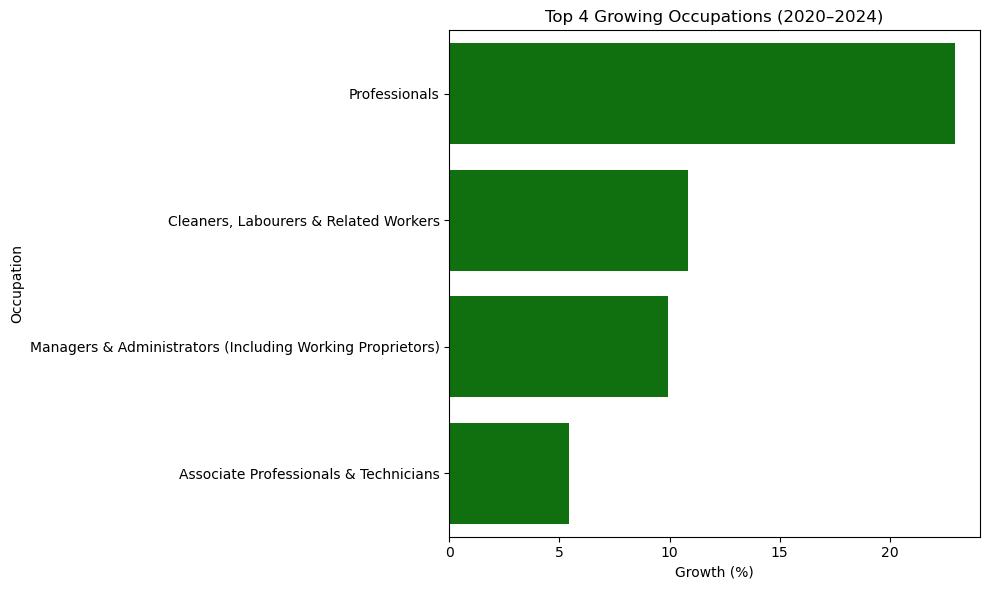

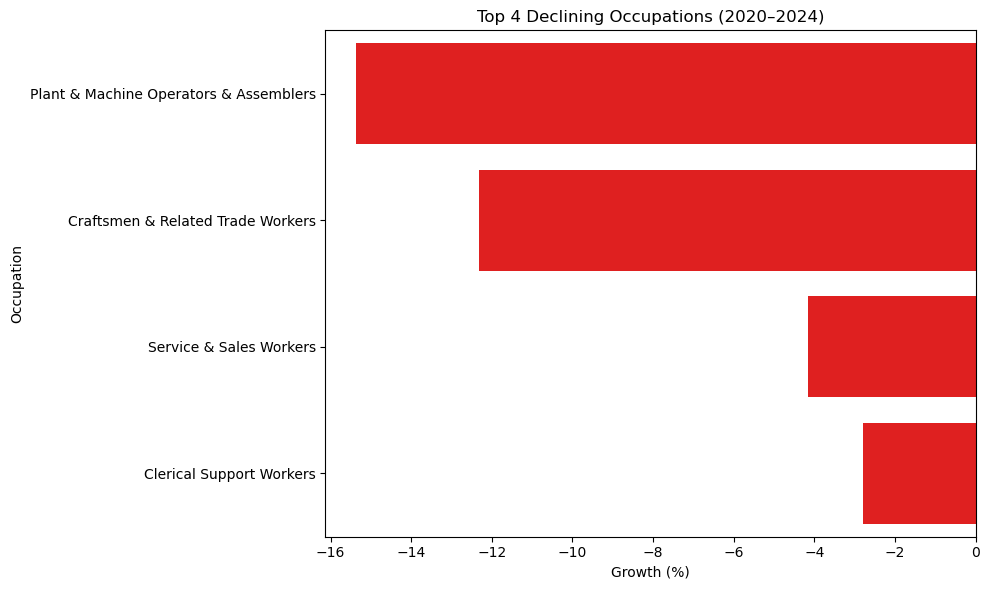

In [82]:
#4.Top 4 Growing & Declining Occupations

start_year = "2020"
end_year = "2024"

df_occ_growth = df[
    (df["Age Group"] == "All Ages") &
    (df["Occupation"]!="Others") &
    (df["Sex"] == "All") &
    (df["Occupation"] != "All Occupations")
].copy()

# Converting Data Types
df_occ_growth[start_year] = pd.to_numeric(df_occ_growth[start_year], errors="coerce")
df_occ_growth[end_year] = pd.to_numeric(df_occ_growth[end_year], errors="coerce")

# Calculating growth and growth rate
df_occ_growth["Absolute Growth"] = df_occ_growth[end_year] - df_occ_growth[start_year]
df_occ_growth["Growth %"] = (df_occ_growth["Absolute Growth"] / df_occ_growth[start_year]) * 100

# Sort by and select the top 4 growing and declining occupations
df_top_growth = df_occ_growth.sort_values("Growth %", ascending=False).head(4)
df_top_decline = df_occ_growth.sort_values("Growth %", ascending=True).head(4)

# Top 4 Growth Occupations
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_growth, x="Growth %", y="Occupation", color="green")
plt.title("Top 4 Growing Occupations (2020–2024)")
plt.xlabel("Growth (%)")
plt.ylabel("Occupation")
plt.tight_layout()
plt.show()

# Top 4 Declining Occupations
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_decline, x="Growth %", y="Occupation", color="red")
plt.title("Top 4 Declining Occupations (2020–2024)")
plt.xlabel("Growth (%)")
plt.ylabel("Occupation")
plt.tight_layout()
plt.show()

#### Fast-Growing Occupations
1, Professionals recorded the highest growth, Managers & Administrators also expanded steadily.

2, Associate Professionals & Technicians grew moderately.

3, Cleaners & Labourers show growth mainly due to service demand, reflecting Singapore’s ageing population and urban services needs.
#### Declining Occupations
Plant & Machine Operators and Craftsmen & Trade Workers declined sharply, while Service & Sales Workers and Clerical Support Workers also saw contraction.
### Insights
Singapore’s workforce is moving from labor-intensive to knowledge-intensive employment.  
Future opportunities will focus on professional, managerial, and technical fields, while manual and routine work continues to shrink.

**Overall Insight:**  
In 2024, Singapore’s workforce remains gender-diverse but unevenly distributed across occupations, with males dominating most technical and manual roles, while females are more concentrated in support and service-related positions.  

**Male-Majority Occupations:**  
Roles that involve physical labor or machinery operation, such as Craftsmen & Related Trade Workers and Plant & Machine Operators & Assemblers, are predominantly male.
Managers & Administrators also show a slight male majority, though the gender gap is narrower compared to manual jobs.  

**Female-Majority Occupations:**  
Clerical Support Workers and Service & Sales Workers have a higher proportion of female employees, indicating stronger female participation in administrative and customer-oriented roles.  

**Gender-Balanced or Skill-Oriented Roles:**  
Occupations such as Professionals and Associate Professionals & Technicians exhibit a more balanced gender composition, suggesting that skillsets and qualifications play a more significant role than gender in these knowledge-based fields.

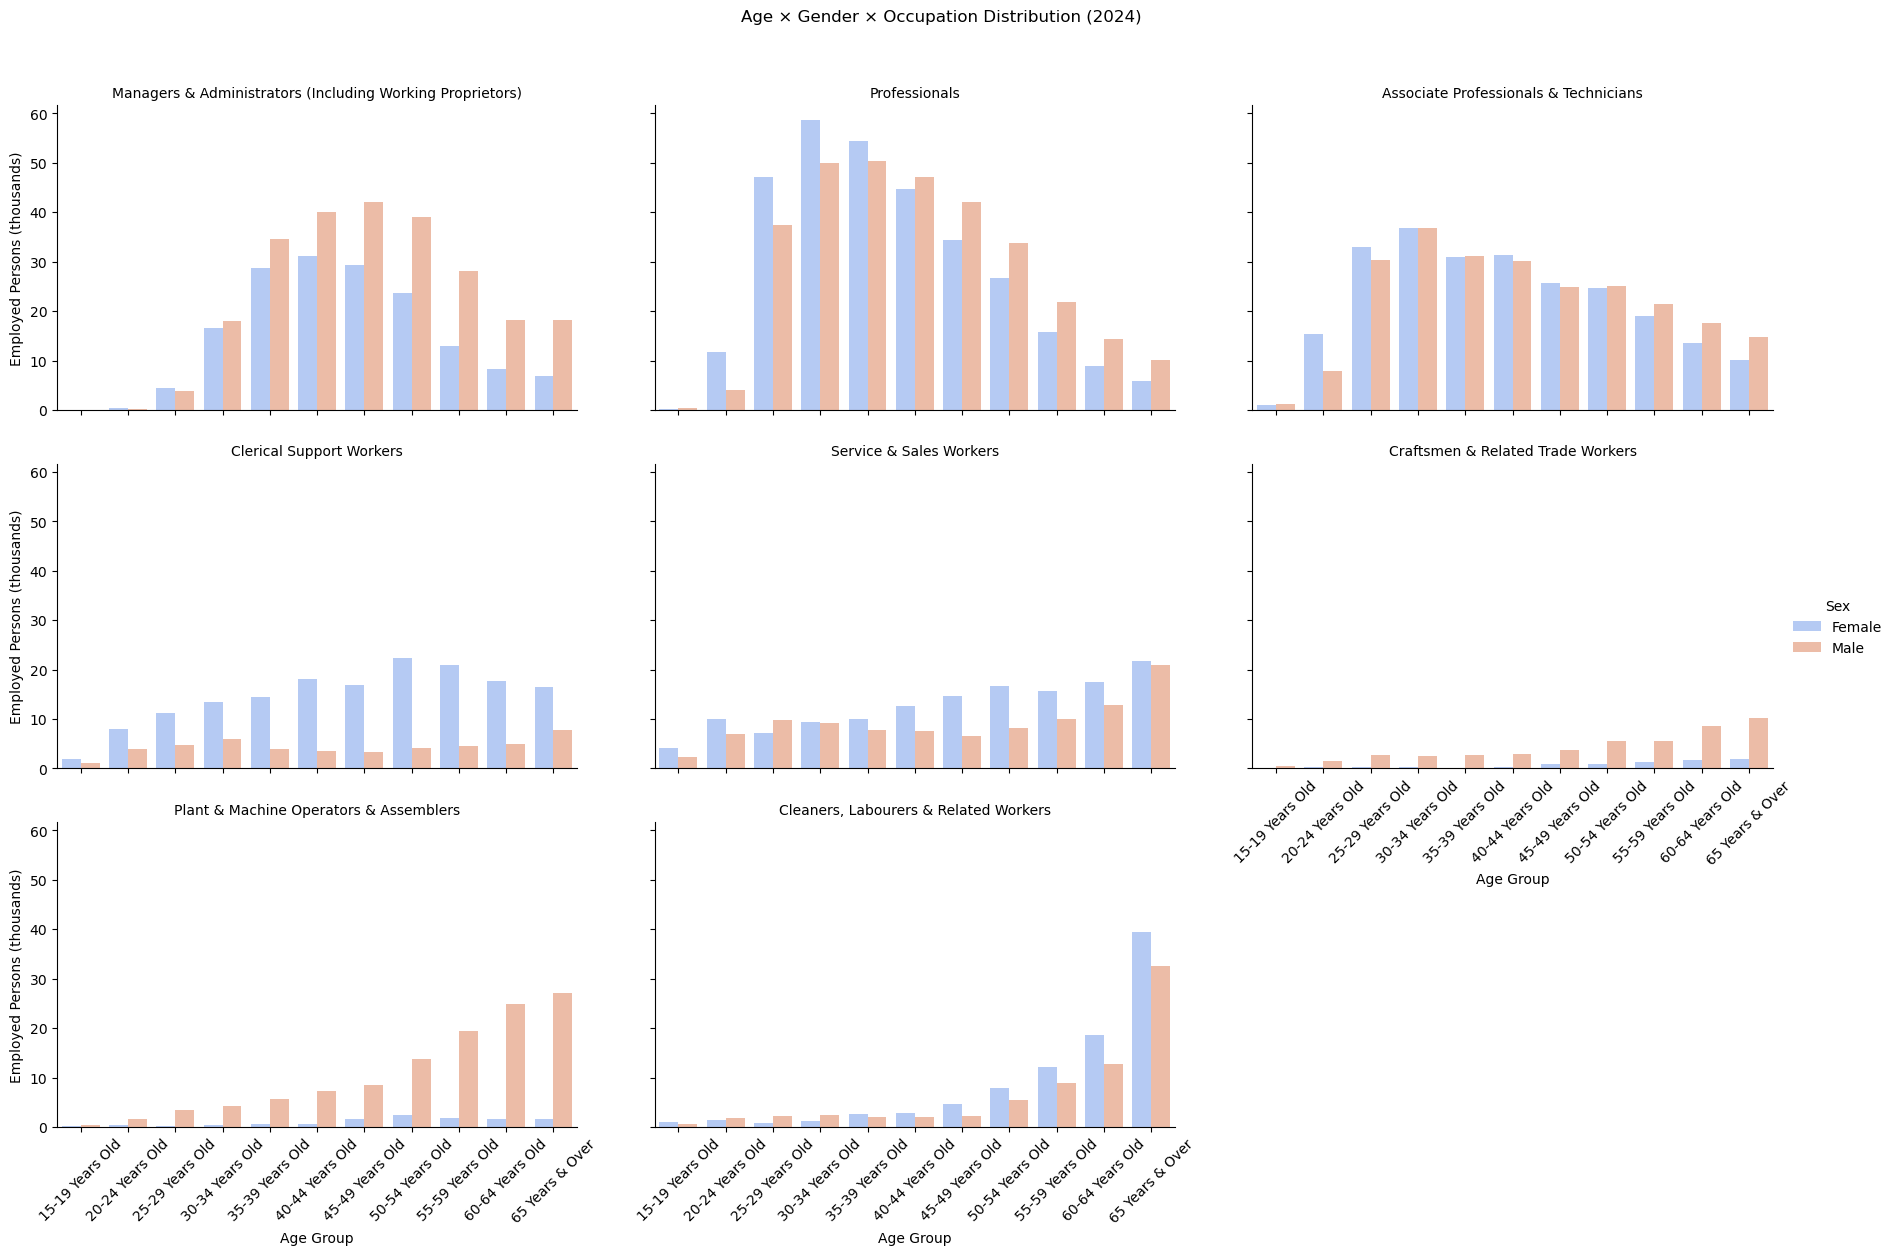

In [83]:
# 6.Occupation × Age × Gender
latest_year = "2024"

selected_occ = df[(df["Sex"]!="All") & (df["Age Group"]!="All Ages")]["Occupation"].unique()

df_age_sex_occ = df[(df["Occupation"].isin(selected_occ)) & 
                     (df["Occupation"]!="Others") &
                     (df["Occupation"]!="All Occupations") &
                    (df["Sex"]!="All") & 
                    (df["Age Group"]!="All Ages")][["Occupation","Age Group","Sex",latest_year]]

df_age_sex_occ[latest_year] = pd.to_numeric(df_age_sex_occ[latest_year], errors="coerce")


g = sns.catplot(data=df_age_sex_occ, 
                x="Age Group", y=latest_year, hue="Sex", 
                col="Occupation", kind="bar", col_wrap=3, 
                height=4, aspect=1.5, palette="coolwarm")

g.set_titles("{col_name}")
g.set_axis_labels("Age Group", "Employed Persons (thousands)")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.subplots_adjust(top=0.9)
g.fig.suptitle(f"Age × Gender × Occupation Distribution ({latest_year})")
plt.show()

**Overall Summary**
The 2024 distribution reveals that while overall participation is balanced in younger age groups, distinct gender patterns emerge as workers advance through their careers.
- **Gender Concentration:** Females are more represented in Clerical Support and Service & Sales roles, whereas males are more prevalent in manual and machinery-related occupations such as Craftsmen and Plant & Machine Operators.
- **Managerial & Professional Roles:** In Managers & Administrators, gender balance is relatively even among younger employees but becomes more male-skewed at older ages. This may reflect generational differences or career progression trends.
- **Age Structure:** Most occupations are concentrated in the 30–54 age range, with fewer young entrants and a gradual increase of older workers in physically demanding or routine jobs.

**Suggestions:** For young people, understanding these dynamics can guide smarter career planning, and to be aware of how gender representation may evolve over time within different career paths.By aligning their choices with these insights, young workers can build careers that are both sustainable and adaptive in an evolving job market.

In [84]:
df=pd.read_csv("salary.csv")
print(df)

     gender                                         occupation  year    value
0      Male  Managers & Administrators (Including Working P...  2023  11297.0
1    Female  Managers & Administrators (Including Working P...  2023  10020.0
2      Male                                      Professionals  2023   8620.0
3    Female                                      Professionals  2023   7520.0
4      Male              Associate Professionals & Technicians  2023   4680.0
..      ...                                                ...   ...      ...
331  Female                 Craftsmen & Related Trades Workers  2001   1256.0
332    Male             Plant & Machine Operators & Assemblers  2001   1734.0
333  Female             Plant & Machine Operators & Assemblers  2001   1148.0
334    Male              Cleaners, Labourers & Related Workers  2001   1160.0
335  Female              Cleaners, Labourers & Related Workers  2001    928.0

[336 rows x 4 columns]


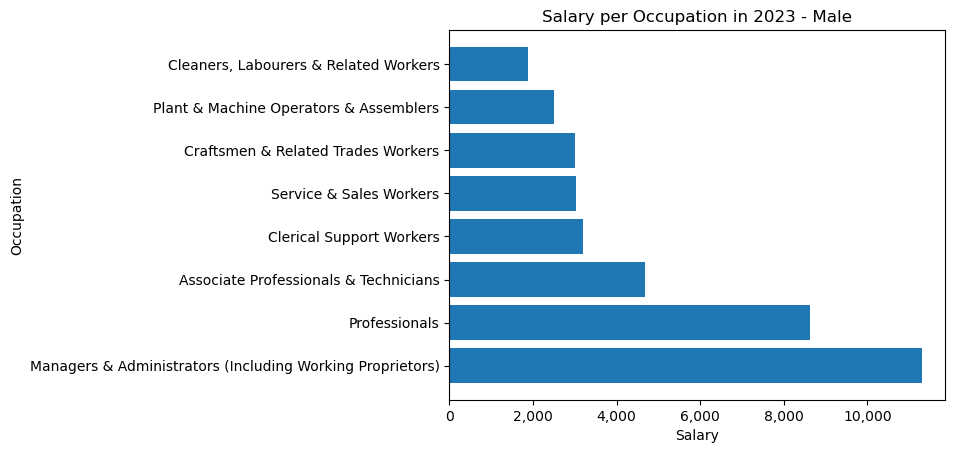

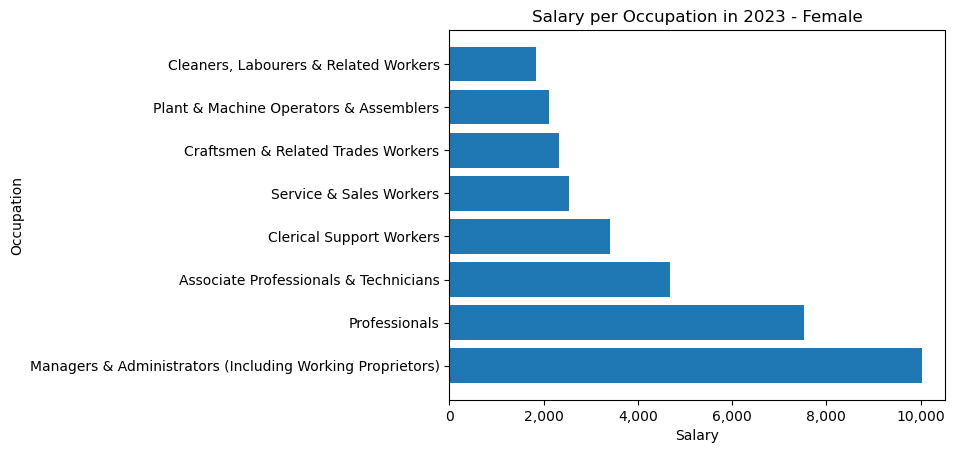

In [85]:
## Last-Year Salary by Gender
# 1. Find latest year
latest_year = df["year"].max()

# 2. Salary by occupation in most recent year, broken down by gender
latest_rank_m = (
    df[(df["year"] == latest_year) & (df["gender"] == "Male")]
    .sort_values("value", ascending=False)
    [["occupation", "value"]]
)
latest_rank_f = (
    df[(df["year"] == latest_year) & (df["gender"] == "Female")]
    .sort_values("value", ascending=False)
    [["occupation", "value"]]
)

plt.barh(latest_rank_m["occupation"], latest_rank_m["value"])
plt.title(f"Salary per Occupation in {latest_year} - Male")
plt.xlabel('Salary')
plt.ylabel('Occupation')
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # ensure x-axis appears in thousands format
plt.show()

plt.barh(latest_rank_f["occupation"], latest_rank_f["value"])
plt.title(f"Salary per Occupation in {latest_year} - Female")
plt.xlabel('Salary')
plt.ylabel('Occupation')
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # ensure x-axis appears in thousands format
plt.show()

As expected, Managers & Administrators are paid the highest, followed by Professionals, which are more than twice compared to the third highest occupation - Associal Professionals & Technicians.

Meanwhile, Cleaners, Labourers & Related Workers are paid the lowest, with most other professions hovering around 3,000 SGD.

This trend remains consistent among both genders.

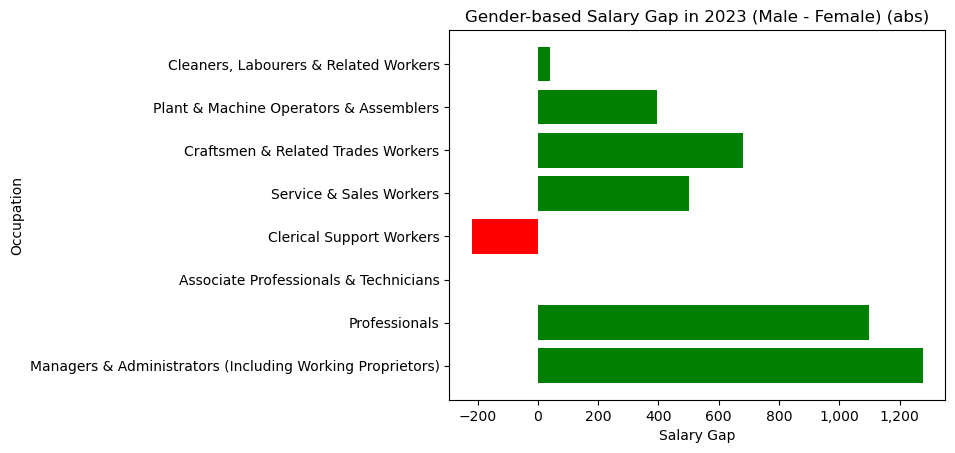

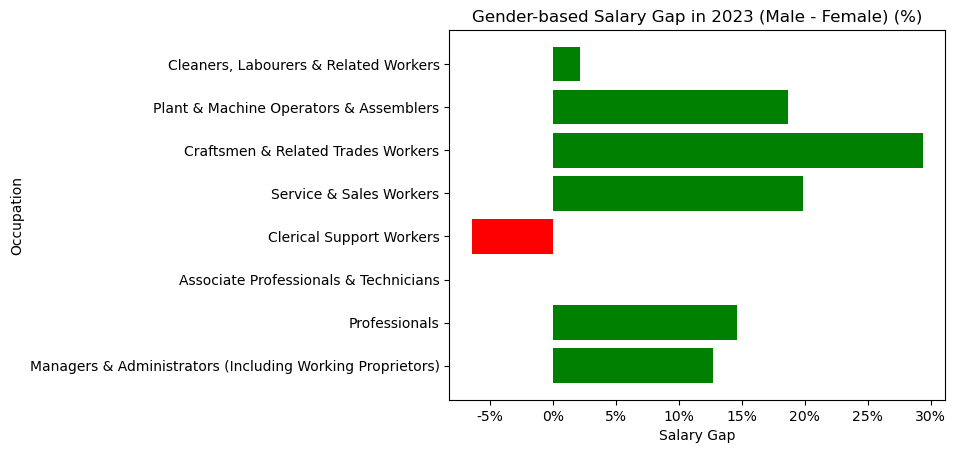

In [86]:
## Last-Year Salary by Gender
# 1. Find latest year
latest_year = df["year"].max()

# 2. Salary by occupation in most recent year, broken down by gender
latest_rank_m = (
    df[(df["year"] == latest_year) & (df["gender"] == "Male")]
    .sort_values("value", ascending=False)
    [["occupation", "value"]]
)
latest_rank_f = (
    df[(df["year"] == latest_year) & (df["gender"] == "Female")]
    .sort_values("value", ascending=False)
    [["occupation", "value"]]
)

# 3. Merge & calculate gender salary gap
latest_salary_gap = latest_rank_m.merge(latest_rank_f, how='left', on='occupation', suffixes=('_m', '_f'))
latest_salary_gap["gap"] = latest_salary_gap["value_m"] - latest_salary_gap["value_f"]
latest_salary_gap["gap_pc"] = (latest_salary_gap["value_m"] - latest_salary_gap["value_f"])/latest_salary_gap["value_f"]*100

# 4. Assign bar colors
import numpy as np
colors = np.where(latest_salary_gap["gap"] >= 0, "green", "red") # assign green to values >0, red to  values <0
colors_pc = np.where(latest_salary_gap["gap_pc"] >= 0, "green", "red") # assign green to values >0, red to  values <0

# 5. Plotting
plt.barh(latest_salary_gap["occupation"], latest_salary_gap["gap"], color=colors)
plt.title(f"Gender-based Salary Gap in {latest_year} (Male - Female) (abs)")
plt.xlabel('Salary Gap')
plt.ylabel('Occupation')
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # ensure x-axis appears in thousands format
plt.show()

plt.barh(latest_salary_gap["occupation"], latest_salary_gap["gap_pc"], color=colors)
plt.title(f"Gender-based Salary Gap in {latest_year} (Male - Female) (%)")
plt.xlabel('Salary Gap')
plt.ylabel('Occupation')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.0f}%'))
#plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f%}')) # ensure x-axis appears in thousands format
plt.show()

Most occupations see clear salary gap between male and female workers, with highest absolute gap observed in higher paid professions, namely Professionals and Managers & Administrators.

In terms of percentage, professions within lower-middle tiers show the highest pay gap (20 - 30%), namely Plant & Machine Operators & Assemblers, Craftsmen & Related Trades Workers, and Services & Sales Workers.

Clarical Support Workers is the only profession where females earn more by ~220 SGD, while Associate Professionals & Technicals see no difference between male and female workers.

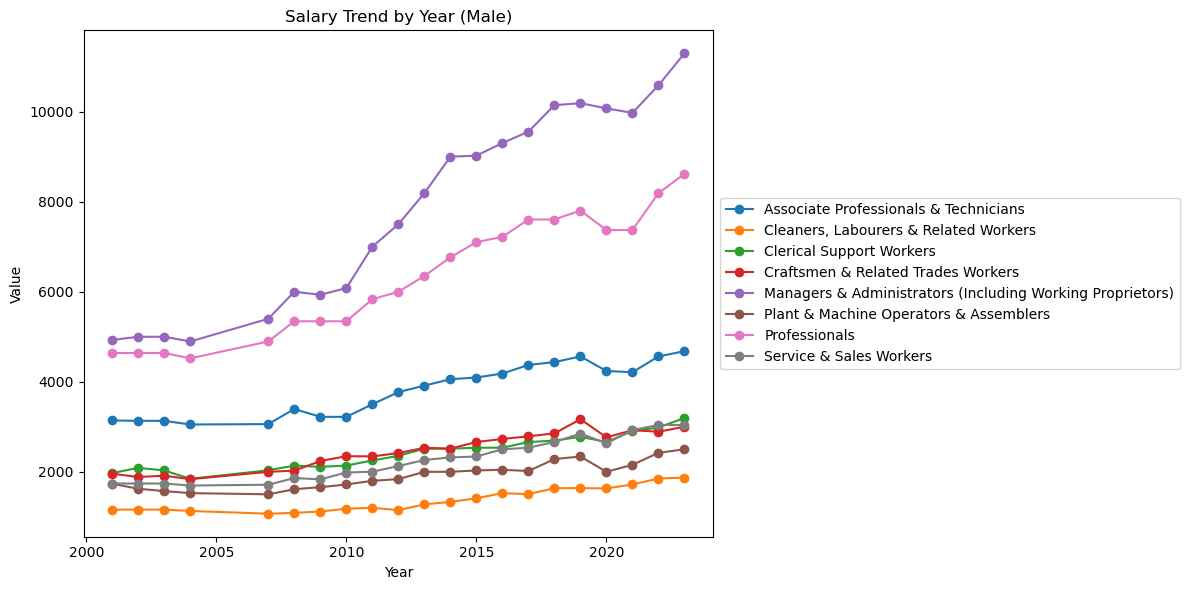

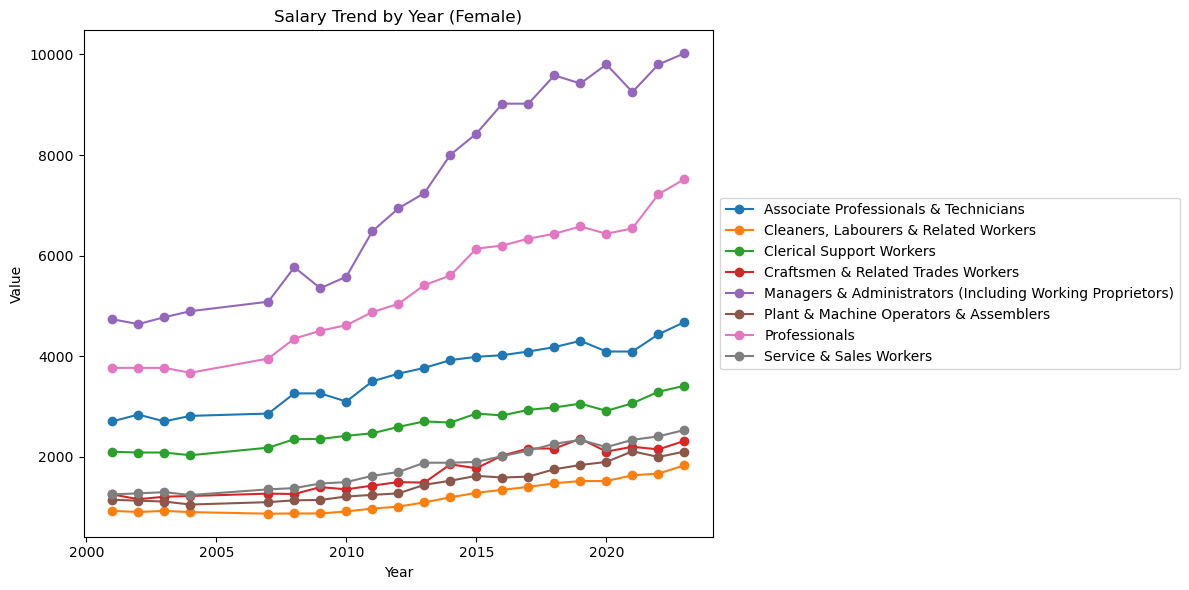

In [87]:
plt.figure(figsize=(12,6))

# Loop through and draw a line chart for each occupation group:
for occ, group in df[df["gender"]=="Male"].groupby("occupation"):
    plt.plot(group["year"], group["value"], marker="o", label=occ)

plt.title("Salary Trend by Year (Male)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))

# Loop through and draw a line chart for each occupation group:
for occ, group in df[df["gender"]=="Female"].groupby("occupation"):
    plt.plot(group["year"], group["value"], marker="o", label=occ)

plt.title("Salary Trend by Year (Female)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


All professions see year-on-year growth at different rates.

While aggressive growth rate has been observed for Professionals and Managers & Administrators, the rest see gradual growth only.

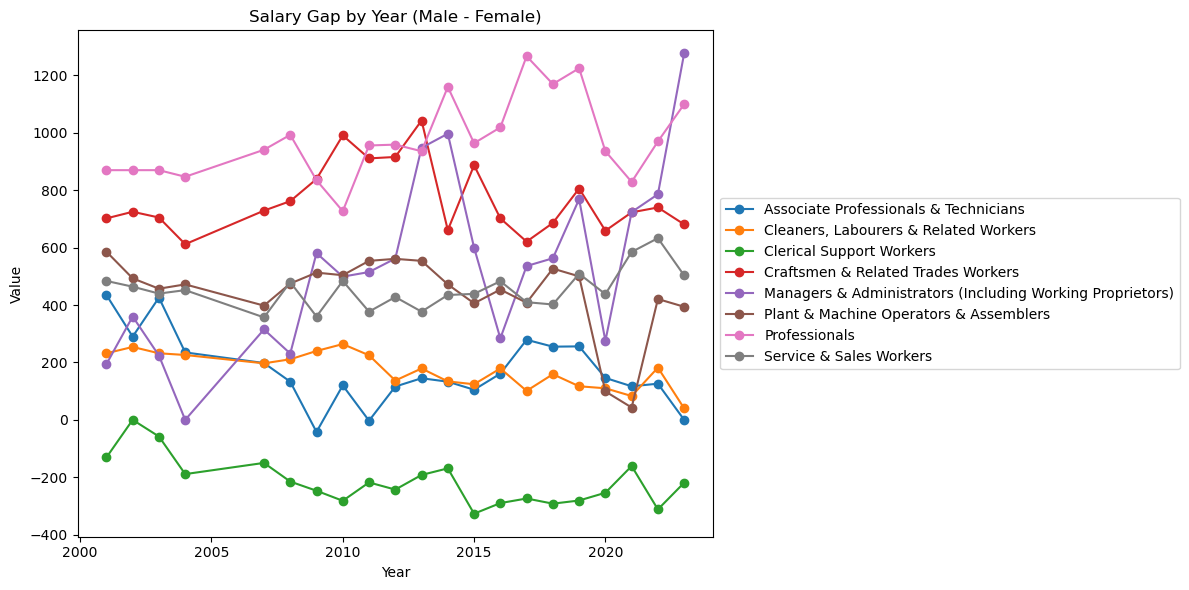

In [88]:
# 3. Merge & calculate gender salary gap
salary_gap = df[df["gender"]=="Male"].merge(df[df["gender"]=="Female"], how='left', on=('occupation','year'), suffixes=('_m', '_f'))
salary_gap["gap"] = salary_gap["value_m"] - salary_gap["value_f"]

# 4. Assign bar colors
import numpy as np
colors = np.where(salary_gap["gap"] >= 0, "green", "red") # assign green to values >0, red to  values <0

plt.figure(figsize=(12,6))

# Loop through and draw a line chart for each occupation group:
for occ, group in salary_gap.groupby("occupation"):
    plt.plot(group["year"], group["gap"], marker="o", label=occ)

plt.title("Salary Gap by Year (Male - Female)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

Compared to 2000, salaries in 2025 have seen higher gender pay gap specifically for high-salary professions such as Professionals and Managers & Administrators.

The rest of the professions see fluctuations but no major changes compared to 2000.

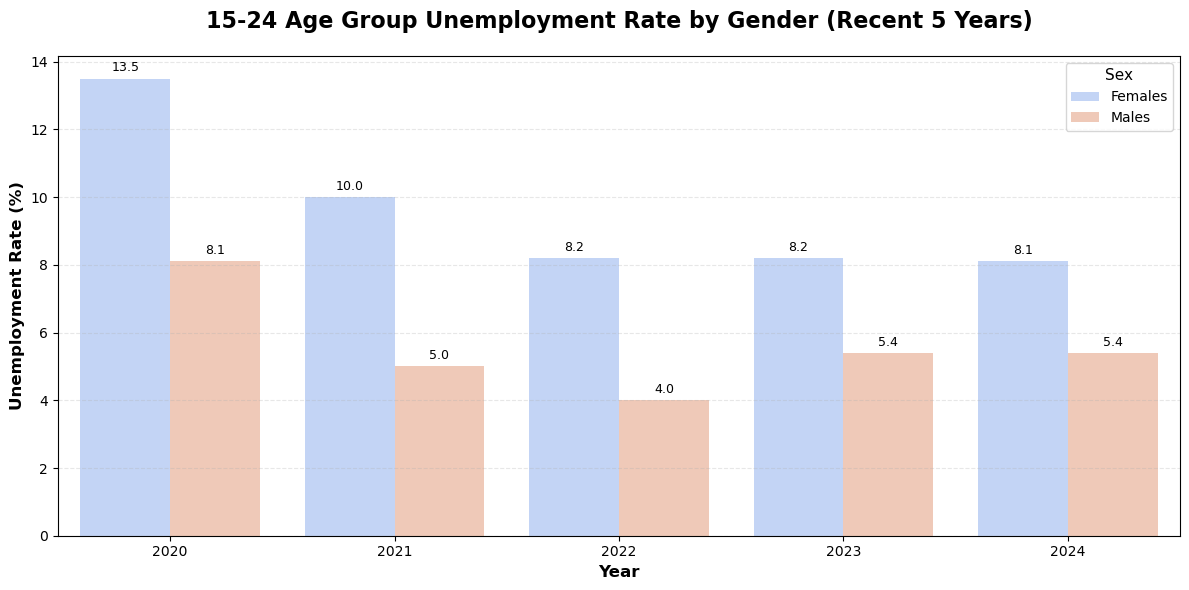

In [89]:
# Read unemployment data categorized by gender
df = pd.read_csv("unemployment_by_sex.csv")

# Filter data for the 15-24 age group
df_15_24 = df[df["Category"] == "15-24"].copy()

# Get the most recent 5 years
latest_year = df_15_24["Year"].max()
recent_years = sorted(df_15_24["Year"].unique())[-5:]

# Filter data for the recent 5 years
df_recent = df_15_24[df_15_24["Year"].isin(recent_years)].copy()

# Ensure Unemployment is numeric
df_recent["Unemployment"] = pd.to_numeric(df_recent["Unemployment"], errors="coerce")

# Convert Year to string for easier display
df_recent["Year"] = df_recent["Year"].astype(str)

#  Visualization 
plt.figure(figsize=(12, 6))

# Create grouped bar chart using seaborn
ax = sns.barplot(
    data=df_recent, 
    x="Year", 
    y="Unemployment", 
    hue="Sex",
    palette="coolwarm",
    alpha=0.8
)

# Set title and labels
plt.title(f"15-24 Age Group Unemployment Rate by Gender (Recent 5 Years)", 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Unemployment Rate (%)", fontsize=12, fontweight='bold')

# Set legend
plt.legend(title="Sex", fontsize=10, title_fontsize=11, loc='upper right')

# Display values on the bar chart
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3, fontsize=9)

# Grid lines
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Adjust layout
plt.tight_layout()
plt.show()

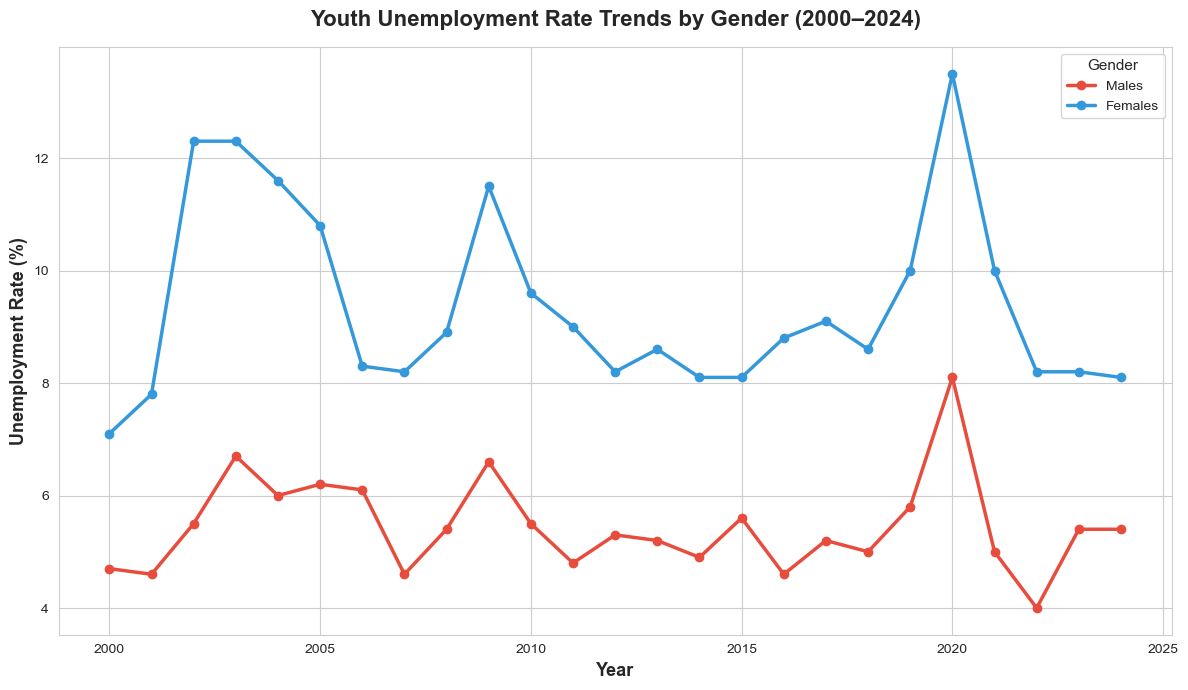

In [90]:
# Filter for youth (15–24)
df_15_24 = df[df["Category"] == "15-24"].copy()
df_15_24 = df_15_24[(df_15_24["Year"] >= 2000) & (df_15_24["Year"] <= 2024)]
df_15_24["Unemployment"] = pd.to_numeric(df_15_24["Unemployment"], errors="coerce")
df_15_24 = df_15_24.dropna(subset=["Unemployment"])

#Line Chart by Gender

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

colors = {"Males": "#e74c3c", "Females": "#3498db"}

for sex, color in colors.items():
    df_plot = df_15_24[df_15_24["Sex"] == sex].sort_values("Year")
    plt.plot(df_plot["Year"], df_plot["Unemployment"],
             label=sex, color=color, linewidth=2.5, marker='o', markersize=6)

plt.title("Youth Unemployment Rate Trends by Gender (2000–2024)", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Year", fontsize=13, fontweight="bold")
plt.ylabel("Unemployment Rate (%)", fontsize=13, fontweight="bold")
plt.legend(title="Gender", fontsize=10, title_fontsize=11)
plt.tight_layout()

plt.show()


<Figure size 1400x800 with 0 Axes>

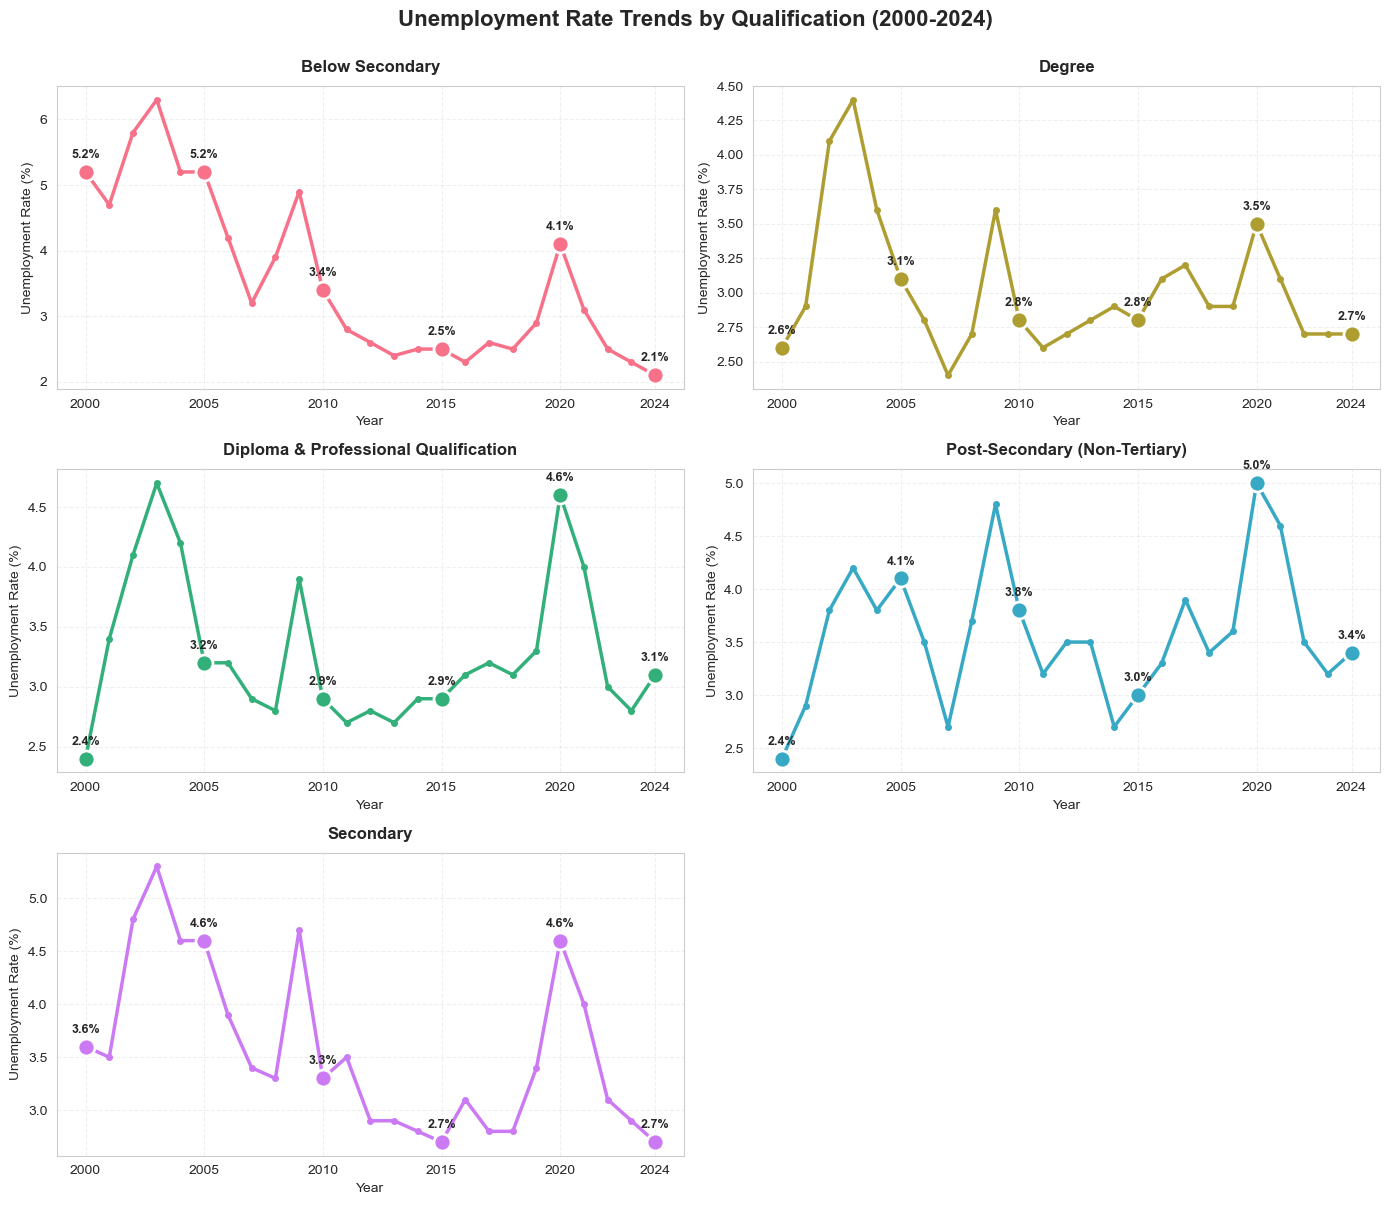

In [91]:
# Read unemployment data categorized by education level
df = pd.read_csv("unemployment_by_qualification.csv")

# Filter data for the years 2000-2024
df_filtered = df[(df["Year"] >= 2000) & (df["Year"] <= 2024)].copy()

# Ensure Unemployment is numeric
df_filtered["Unemployment"] = pd.to_numeric(df_filtered["Unemployment"], errors="coerce")

# Remove missing values
df_filtered = df_filtered.dropna(subset=["Unemployment"])
marker_years = [2000, 2005, 2010, 2015, 2020, 2024]


#Visualization 
plt.figure(figsize=(14, 8))

# Set color scheme
qualifications = df_filtered["Highest Qualification"].unique()
colors = sns.color_palette("husl", n_colors=len(qualifications))


# Generate faceted plots (one subplot per qualification) 
# Calculate subplot layout
n_quals = len(qualifications)
n_cols = 2
n_rows = int(np.ceil(n_quals / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
axes = axes.flatten() 

for idx, qual in enumerate(qualifications):
    ax = axes[idx]
    qual_data = df_filtered[df_filtered["Highest Qualification"] == qual].sort_values("Year")
    
    # Plot line
    ax.plot(qual_data["Year"], qual_data["Unemployment"], 
            color=colors[idx], linewidth=2.5, marker='o', markersize=4)
    
    # Mark points for every 5 years
    marker_data = qual_data[qual_data["Year"].isin(marker_years)]
    ax.scatter(marker_data["Year"], marker_data["Unemployment"], 
              color=colors[idx], s=150, zorder=5, edgecolors='white', linewidth=2)
    
    # Add value labels
    for _, row in marker_data.iterrows():
        ax.annotate(f'{row["Unemployment"]:.1f}%', 
                   xy=(row["Year"], row["Unemployment"]),
                   xytext=(0, 10), textcoords='offset points',
                   ha='center', fontsize=9, fontweight='bold')
    
    # Set title and labels
    ax.set_title(qual, fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel("Year", fontsize=10)
    ax.set_ylabel("Unemployment Rate (%)", fontsize=10)
    ax.set_xticks(marker_years)
    ax.grid(True, alpha=0.3, linestyle='--')

# Hide excess subplots
for idx in range(n_quals, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle("Unemployment Rate Trends by Qualification (2000-2024)", 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


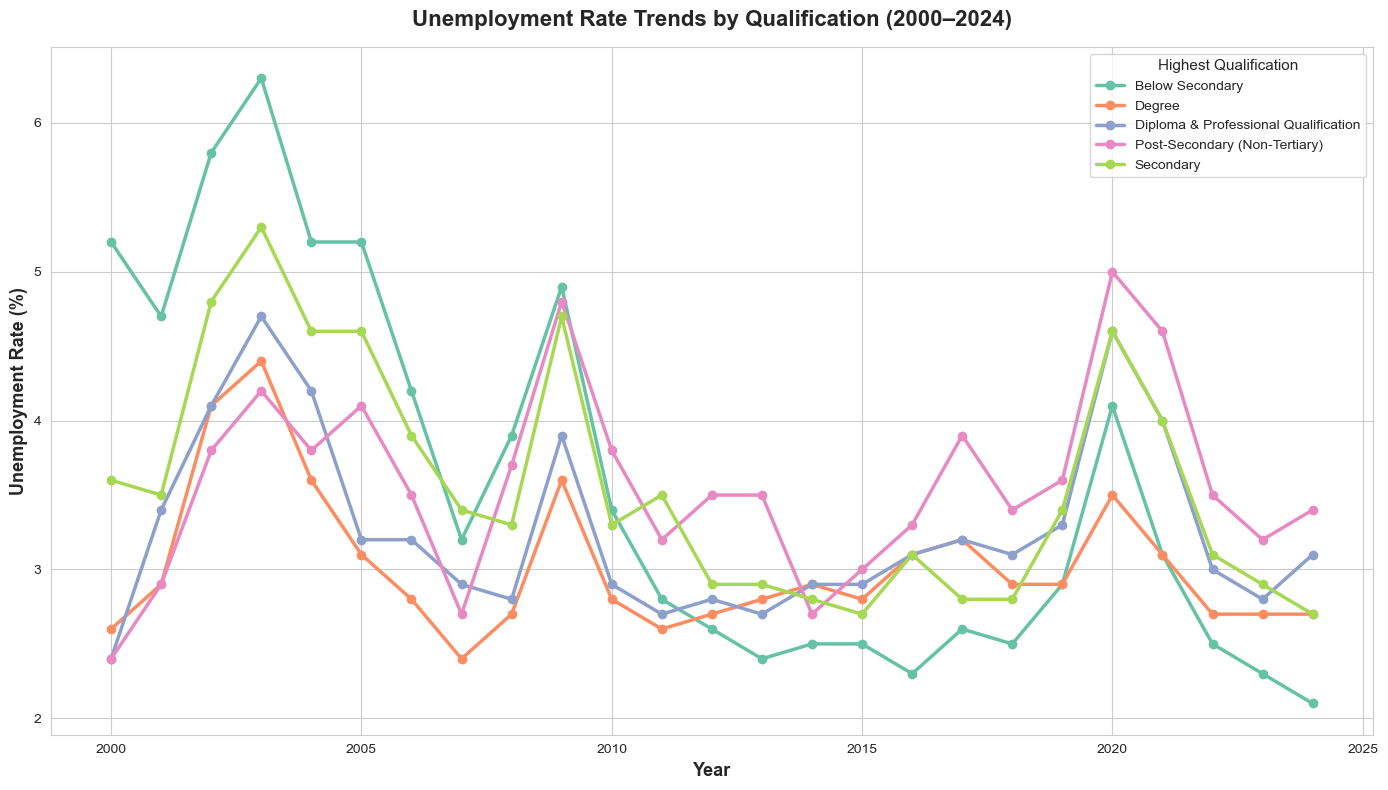

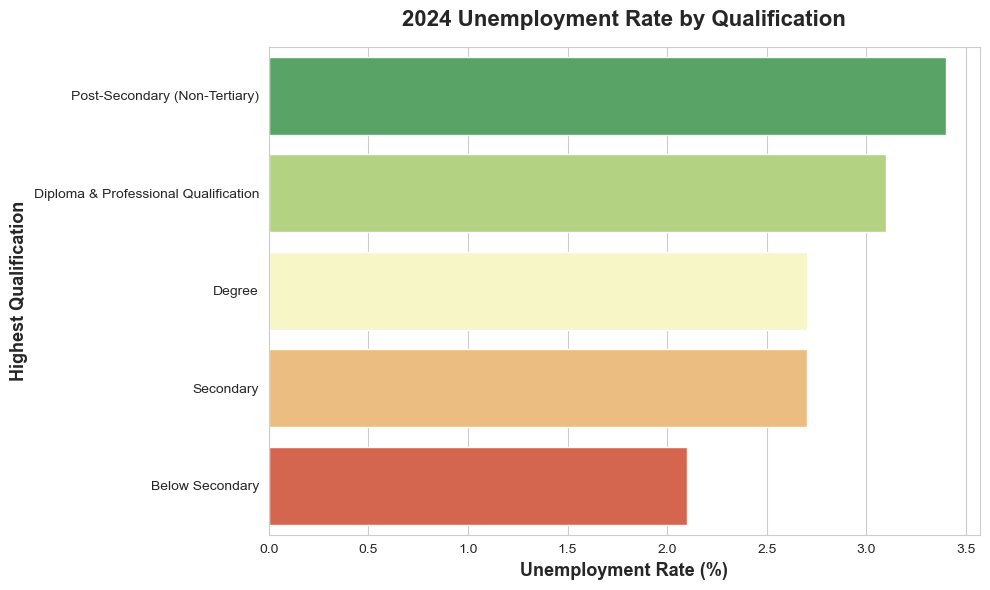

In [92]:
df["Unemployment"] = pd.to_numeric(df["Unemployment"], errors="coerce")
df = df[(df["Year"] >= 2000) & (df["Year"] <= 2024)]
df = df.dropna(subset=["Unemployment"])


#  Line Chart: Unemployment Rate Trends (2000–2024)

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Define color palette
qualifications = sorted(df["Highest Qualification"].unique())
palette = sns.color_palette("Set2", len(qualifications))

for i, qual in enumerate(qualifications):
    df_plot = df[df["Highest Qualification"] == qual].sort_values("Year")
    plt.plot(df_plot["Year"], df_plot["Unemployment"], 
             label=qual, linewidth=2.5, color=palette[i], marker='o', markersize=6)

plt.title("Unemployment Rate Trends by Qualification (2000–2024)", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Year", fontsize=13, fontweight="bold")
plt.ylabel("Unemployment Rate (%)", fontsize=13, fontweight="bold")
plt.legend(title="Highest Qualification", fontsize=10, title_fontsize=11)
plt.tight_layout()

plt.show()

# Bar Chart: 2024 Unemployment Comparison


df_2024 = df[df["Year"] == 2024].sort_values("Unemployment", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_2024, 
            y="Highest Qualification", 
            x="Unemployment", 
            palette="RdYlGn_r", 
            hue="Highest Qualification",
            edgecolor="white")

plt.title("2024 Unemployment Rate by Qualification", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Unemployment Rate (%)", fontsize=13, fontweight="bold")
plt.ylabel("Highest Qualification", fontsize=13, fontweight="bold")
plt.tight_layout()

plt.show()

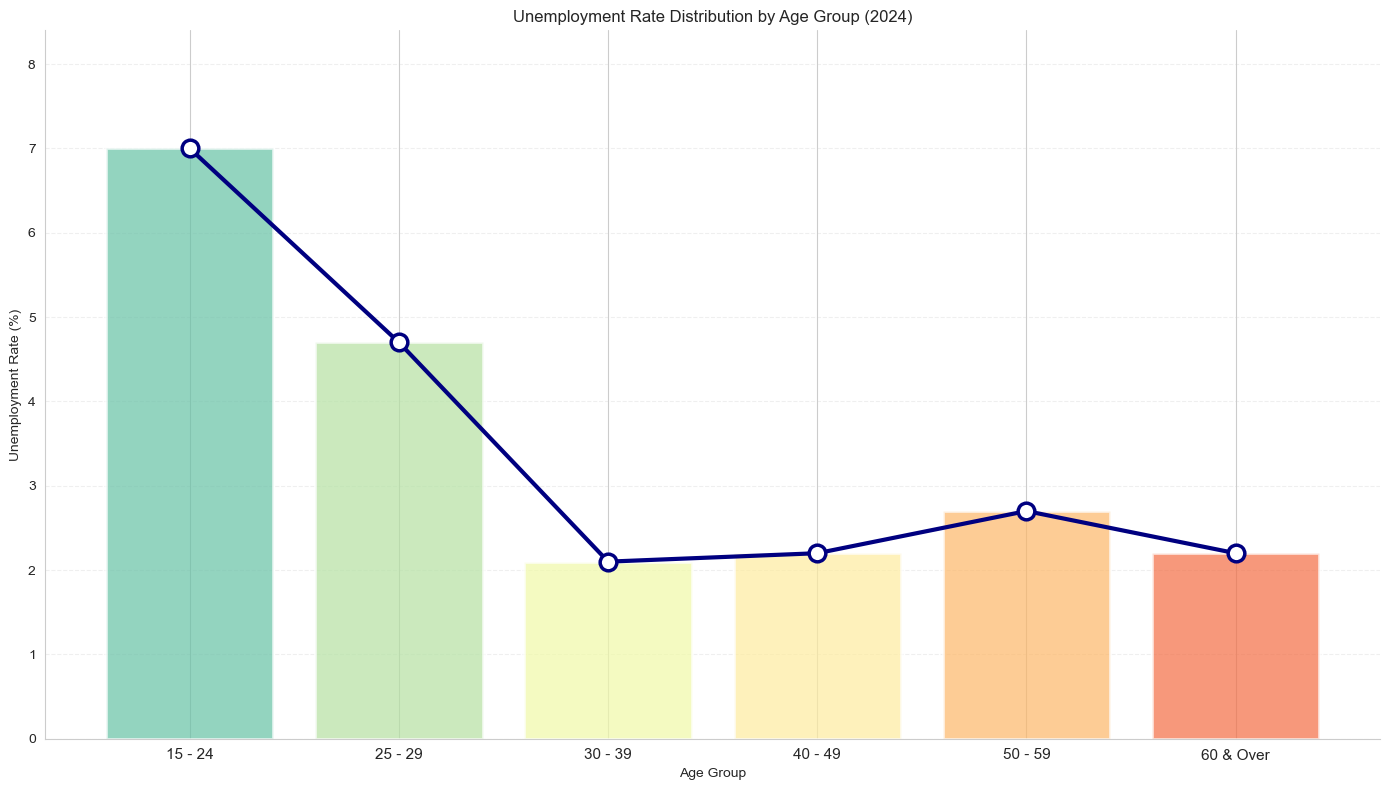

In [93]:
# Read unemployment data categorized by age group
df = pd.read_csv("unemployment_by_age.csv")

# Filter data for the year 2024
df_2024 = df[df["Year"] == 2024].copy()

# Ensure Unemployment is numeric
df_2024["Unemployment"] = pd.to_numeric(df_2024["Unemployment"], errors="coerce")

# Define target age groups (in order)
target_age_groups = [
    "15 - 24",
    "25 - 29", 
    "30 - 39",
    "40 - 49",
    "50 - 59",
    "60 & Over"
]

# Filter for specified age groups
df_filtered = df_2024[df_2024["Age Group"].isin(target_age_groups)].copy()

# Sort by the specified order
df_filtered["Age Group"] = pd.Categorical(
    df_filtered["Age Group"], 
    categories=target_age_groups, 
    ordered=True
)
df_filtered = df_filtered.sort_values("Age Group").reset_index(drop=True)

# Prepare data for plotting
x = np.arange(len(df_filtered))
y = df_filtered["Unemployment"].values
labels = df_filtered["Age Group"].values

#  Multi-color area chart 

fig, ax = plt.subplots(figsize=(14, 8))

# Use gradient colors to fill each area
colors = plt.cm.Spectral_r(np.linspace(0.2, 0.8, len(df_filtered)))

ax.bar(x, y, color=colors, alpha=0.7, edgecolor='white', linewidth=2)
ax.plot(x, y, color='navy', linewidth=3, marker='o', markersize=12,
        markerfacecolor='white', markeredgewidth=2.5, markeredgecolor='navy')

# axes, labels, title
ax.set_xticks(x); ax.set_xticklabels(labels, fontsize=11)
ax.set(xlabel="Age Group", ylabel="Unemployment Rate (%)",
       title="Unemployment Rate Distribution by Age Group (2024)")
ax.grid(True, alpha=0.3, linestyle='--', axis='y'); ax.set_axisbelow(True)
ax.spines[['top','right']].set_visible(False)
ax.set_ylim(0, max(y) * 1.2)

plt.tight_layout()
plt.show()

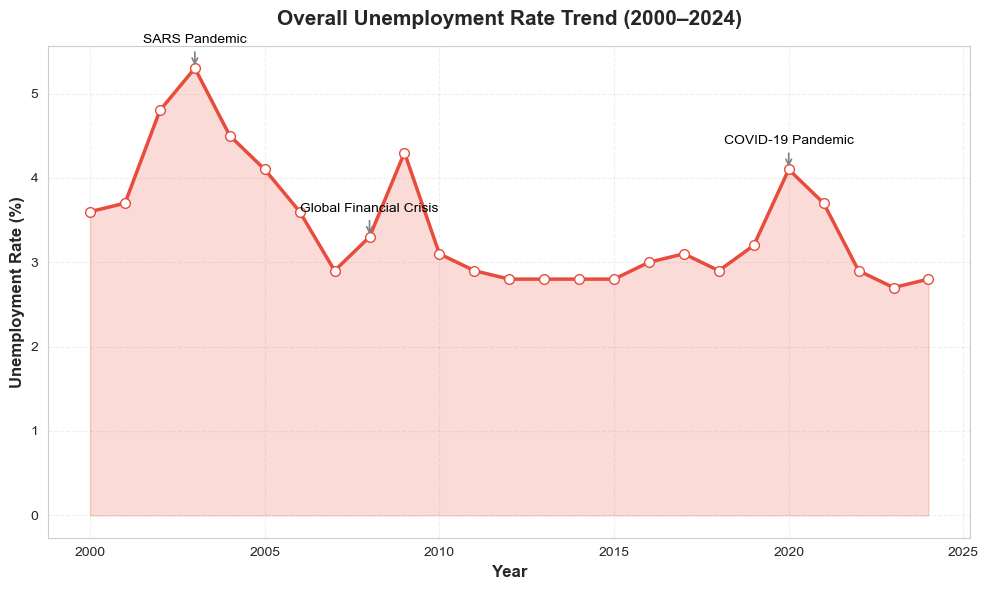

In [94]:
df_overall = df[df["Age Group"] == "Total"].copy()
# Filter year range
df_overall = df_overall[(df_overall["Year"] >= 2000) & (df_overall["Year"] <= 2024)].copy()
df_overall["Unemployment"] = pd.to_numeric(df_overall["Unemployment"], errors="coerce")
df_overall = df_overall.sort_values("Year")

#Plot overall trend

plt.figure(figsize=(10, 6))
x = df_overall["Year"]
y = df_overall["Unemployment"]

# Main line
plt.plot(x, y, color="#e74c3c", linewidth=2.5, marker="o", markersize=7,
         markerfacecolor="white", markeredgecolor="#e74c3c", label="Unemployment Rate")

# Shaded area under the line
plt.fill_between(x, y, color="#e74c3c", alpha=0.2)

# Annotate major events
events = {2003: "SARS Pandemic", 2008: "Global Financial Crisis", 2020: "COVID-19 Pandemic"}
for year, label in events.items():
    if year in x.values:
        y_val = df_overall.loc[df_overall["Year"] == year, "Unemployment"].values[0]
        plt.annotate(label,
                     xy=(year, y_val),
                     xytext=(year, y_val + 0.3),
                     arrowprops=dict(arrowstyle="->", color="gray", lw=1.2),
                     ha="center", fontsize=10, color="black")

plt.title("Overall Unemployment Rate Trend (2000–2024)", fontsize=15, fontweight="bold", pad=15)
plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("Unemployment Rate (%)", fontsize=12, fontweight="bold")
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

## Key Insights from Singapore Unemployment Analysis 

1. **Overall Trend:**  
   Economic crises such as SARS (2003), Global Financial Crisis (2008), and COVID-19 (2020) caused noticeable spikes in unemployment. Overall, the unemployment rate has gradually stabilized post-crises.

2. **Age Vulnerability:**  
   Youth (15–24) and older workers (60 & Over) experience the highest unemployment rates while middle-aged groups (25–59) generally have lower and more stable unemployment rates.

3. **Youth Gender Gap:**  
   Males and females show slightly different trends in youth unemployment, while the gender gap exists but remains moderate over the 2000–2024 period.

4. **Education Effect:**  
    Higher educational attainment correlates with lower unemployment rates. In 2024, individuals with lower qualifications face the highest unemployment, whereas graduates and post-graduates experience lower risk.

5. **Suggestions:**  
   Targeted support for youth and older workers can help reduce unemployment rate, while promoting higher education and skill development may further enhance employment resilience.